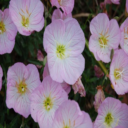

In [ ]:
import torchvision
import torch 
from PIL import Image

size = (128, 128)
transform = torchvision.transforms.Compose([ # helper function that chains together multiple image transformations into one single func
    torchvision.transforms.Resize(size), # resize the image to the specified size
    torchvision.transforms.ToTensor()]) # convert the image to a tensor

train_dataset = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True) # Apply above transformations to data and download it if not already present
test_dataset = torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True) 

'''
img.permute(1,2,0) ==>
Rearranges the tensor dimensions from (C, H, W) to (H, W, C).
Because PIL and NumPy expect images in height × width × channels format

* 255 ==> 
Scales the pixel values from [0, 1] to [0, 255] for visualization

.to(torch.uint8) ==>
Converts the tensor’s data type to 8-bit unsigned integers, which is the typical pixel format for images

'''
def visualize_image(img: torch.Tensor): 
    return Image.fromarray((img.permute(1,2,0) * 255).to(torch.uint8).numpy()) # convert the tensor to a PIL image for visualization

visualize_image(train_dataset[0][0])



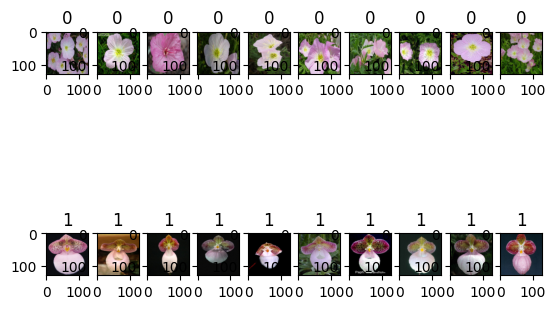

In [32]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2,10)
for i, (img, label) in enumerate(list(train_dataset)[:20]):
    ax[i // 10, i % 10].imshow(visualize_image(img))
    ax[i // 10, i % 10].set_title(label)
   
class_01 =list(train_dataset)[:20]

## Nearest Neigbor Classifier

##### $ f: \mathbb{R} \rightarrow \{0,1\}$
- Input $\mathbb{x}$
- Find closest data point $(\tilde x, l) \in \mathcal{D}$ in dataset $\mathcal{D}$
- Return its label $l$



In [40]:
def nn_classifier(x):
    dist = [(torch.linalg.norm(x-img), l) for img, l in class_01]
    return min(dist)[1]
nn_classifier(test_dataset[0][0])
accuracy = sum(nn_classifier(x) == 1 for x,l in list(test_dataset)[:20])/ 20
print(accuracy)

0.6


## K-Nearest Neigbor Classifier

##### $ f: \mathbb{R} \rightarrow \{0,1\}$
- Input $\mathbb{x}$
- Find k closest data points in dataset $\mathcal{D}$
- Return most common label $l$

In [43]:
def knn_classifier(x, k=3):
    dist = [(torch.linalg.norm(x-img), l) for img, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return sorted(k_closest)[k//2]
knn_classifier(test_dataset[0][0], k=5)
accuracy = sum(nn_classifier(x) == 1 for x,l in list(test_dataset)[:20])/ 20
print(accuracy)

0.5


## K-Nearest Neigbor Regression

##### $ f: \mathbb{R} \rightarrow \mathbb{R}$
- Input $\mathbb{x}$
- Find k closest data points in dataset $\mathcal{D}$
- Return avg value

In [44]:
def knn_regression(x, k=3):
    dist = [(torch.linalg.norm(x-img), l) for img, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())
knn_regression(test_dataset[3][0])

tensor(0.6667)